In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
expression_df = pd.read_csv('gene_expression.csv', index_col=0)
mappings_df = pd.read_csv('gene_mappings.csv')
metadata_df = pd.read_csv('metadata.csv')

In [4]:
PAM50_genes = [
    "ACTR3B", "ANLN", "BAG1", "BCL2", "BIRC5", "BLVRA", "CCNB1", "CCNE1", "CDC20", "CDC6",
    "CDH3", "CENPF", "CEP55", "CXXC5", "EGFR", "ERBB2", "ESR1", "EXO1", "FGFR4", "FOXA1",
    "FOXC1", "GPR160", "GRB7", "KIF2C", "KIF4A", "KRT14", "KRT17", "KRT5", "MAPT", "MDM2",
    "MELK", "MIA", "MKI67", "MLPH", "MYBL2", "MYC", "NAT1", "ORC6", "PGR", "PHGDH",
    "PTTG1", "RRM2", "SFRP1", "SLC39A6", "TMEM45B", "TYMS", "UBE2C", "UBE2T", "FOXM1", "MMP11"
]

SCML_genes = ["ESR1", "ERBB2", "AURKA"]

In [5]:
print(f"Number of PAM 50 genes: {len(PAM50_genes)}\nNumber of SCML genes: {len(SCML_genes)}")

Number of PAM 50 genes: 50
Number of SCML genes: 3


In [6]:
expression_df.head(5)

,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,...,TCGA-32-2616-01A-01R-1850-01,TCGA-06-0750-01A-01R-1849-01,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01
ENSEMBLID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,3646,5369,2127,1743,1032,2477,8999,2996,7061,6383,...,4011,4202,3538,5095,3967,5304,11385,3366,3789,5050
ENSG00000000005,12,1,0,6,11,50,9,6,144,0,...,26,57,9,30,7,6,7,7,6,8
ENSG00000000419,2340,1104,742,1438,6034,2775,1624,2972,6406,3568,...,1537,1367,1165,1463,1261,1446,1208,1140,943,1014
ENSG00000000457,1355,1669,911,2361,2136,1430,1263,2917,1221,959,...,503,358,262,413,460,690,403,506,467,462
ENSG00000000460,614,636,328,400,1066,375,453,2008,575,1234,...,434,158,234,346,457,668,191,276,208,296


In [7]:
expression_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60616 entries, ENSG00000000003 to ENSG00000288675
Columns: 783 entries, TCGA-B6-A0IG-01A-11R-A034-07 to TCGA-28-1747-01C-01R-1850-01
dtypes: int64(783)
memory usage: 362.6+ MB


In [8]:
mappings_df.head(5)

,ENSEMBLID,GENESYMBOL,GENETYPE
0,ENSG00000000003,TSPAN6,protein_coding
1,ENSG00000000005,TNMD,protein_coding
2,ENSG00000000419,DPM1,protein_coding
3,ENSG00000000457,SCYL3,protein_coding
4,ENSG00000000460,C1orf112,protein_coding


In [9]:
metadata_df.head(5)

,mRNA,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2
0,TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.73,-0.568397,Positive,Positive,Positive
1,TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.52,-0.821974,NaN,NaN,Negative
2,TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.79,0.423067,Negative,Negative,Negative
3,TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.00,0.026868,Positive,Positive,Negative
4,TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.37,0.247682,Positive,Positive,Negative


In [10]:
# merged data expression and mapping data frame together
merged_df = pd.merge(expression_df, mappings_df, on = 'ENSEMBLID')
merged_df

,ENSEMBLID,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
0,ENSG00000000003,3646,5369,2127,1743,1032,2477,8999,2996,7061,...,3538,5095,3967,5304,11385,3366,3789,5050,TSPAN6,protein_coding
1,ENSG00000000005,12,1,0,6,11,50,9,6,144,...,9,30,7,6,7,7,6,8,TNMD,protein_coding
2,ENSG00000000419,2340,1104,742,1438,6034,2775,1624,2972,6406,...,1165,1463,1261,1446,1208,1140,943,1014,DPM1,protein_coding
3,ENSG00000000457,1355,1669,911,2361,2136,1430,1263,2917,1221,...,262,413,460,690,403,506,467,462,SCYL3,protein_coding
4,ENSG00000000460,614,636,328,400,1066,375,453,2008,575,...,234,346,457,668,191,276,208,296,C1orf112,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60611,ENSG00000288669,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AC008763.4,protein_coding
60612,ENSG00000288670,302,474,270,570,446,352,434,436,307,...,154,191,247,121,217,269,786,229,AL592295.6,lncRNA
60613,ENSG00000288671,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AC006486.3,protein_coding
60614,ENSG00000288674,7,10,1,2,4,2,4,10,8,...,2,4,4,8,3,8,9,7,AL391628.1,protein_coding


In [11]:
# Function to check if any PAM50 gene is a prefix of the gene in the dataframe
def is_pam50_gene(gene):
    return any(gene.startswith(pam_gene) for pam_gene in PAM50_genes)

# grab all the genesymbol types and gene type of pam50 
pam50_df = merged_df[merged_df["GENESYMBOL"].apply(is_pam50_gene)]
pam50_df = pam50_df.reset_index(drop=True)
pam50_df

,ENSEMBLID,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
0,ENSG00000005810,3011,3416,1022,3172,3259,4047,2958,6913,3910,...,1014,1073,1558,886,793,1619,3781,2108,MYCBP2,protein_coding
1,ENSG00000011426,2630,971,1543,1482,3704,1343,800,3848,3136,...,910,1707,1876,848,321,2516,645,2358,ANLN,protein_coding
2,ENSG00000048392,2850,1882,1303,2167,4243,4022,1451,2398,6811,...,1906,1782,1840,1107,2962,3081,1895,2019,RRM2B,protein_coding
3,ENSG00000054598,410,382,4034,65,313,845,363,423,635,...,626,412,767,114,664,606,1043,513,FOXC1,protein_coding
4,ENSG00000062038,1987,3269,2214,74,1530,7085,3052,1749,2668,...,27,204,161,218,10,65,831,66,CDH3,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,ENSG00000270242,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,ACTR3BP1,processed_pseudogene
123,ENSG00000270499,1,0,2,4,0,3,0,0,1,...,0,1,3,1,1,5,4,1,MKI67P1,processed_pseudogene
124,ENSG00000279685,16,51,0,297,0,4,68,13,2,...,10,10,1,6,3,29,24,11,MAPT-IT1,lncRNA
125,ENSG00000280263,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ACTR3BP6,processed_pseudogene


In [12]:
protein_coding_genes_df = merged_df[merged_df["GENETYPE"]== "protein_coding"] 
protein_coding_genes_df

,ENSEMBLID,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
0,ENSG00000000003,3646,5369,2127,1743,1032,2477,8999,2996,7061,...,3538,5095,3967,5304,11385,3366,3789,5050,TSPAN6,protein_coding
1,ENSG00000000005,12,1,0,6,11,50,9,6,144,...,9,30,7,6,7,7,6,8,TNMD,protein_coding
2,ENSG00000000419,2340,1104,742,1438,6034,2775,1624,2972,6406,...,1165,1463,1261,1446,1208,1140,943,1014,DPM1,protein_coding
3,ENSG00000000457,1355,1669,911,2361,2136,1430,1263,2917,1221,...,262,413,460,690,403,506,467,462,SCYL3,protein_coding
4,ENSG00000000460,614,636,328,400,1066,375,453,2008,575,...,234,346,457,668,191,276,208,296,C1orf112,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60606,ENSG00000288661,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AL451106.1,protein_coding
60611,ENSG00000288669,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AC008763.4,protein_coding
60613,ENSG00000288671,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AC006486.3,protein_coding
60614,ENSG00000288674,7,10,1,2,4,2,4,10,8,...,2,4,4,8,3,8,9,7,AL391628.1,protein_coding


In [13]:
# Filter rows where the identifiers start with 'TCGA'
expression_columns = protein_coding_genes_df.loc[:, 
    protein_coding_genes_df.columns.str.contains('TCGA') | (protein_coding_genes_df.columns == 'ENSEMBLID')
]
expression_columns

# remove rows with mean of 0
filter_mean_0_df = expression_columns[expression_columns.select_dtypes(include='number').mean(axis=1) != 0]
filter_mean_0_df


,ENSEMBLID,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,...,TCGA-32-2616-01A-01R-1850-01,TCGA-06-0750-01A-01R-1849-01,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01
0,ENSG00000000003,3646,5369,2127,1743,1032,2477,8999,2996,7061,...,4011,4202,3538,5095,3967,5304,11385,3366,3789,5050
1,ENSG00000000005,12,1,0,6,11,50,9,6,144,...,26,57,9,30,7,6,7,7,6,8
2,ENSG00000000419,2340,1104,742,1438,6034,2775,1624,2972,6406,...,1537,1367,1165,1463,1261,1446,1208,1140,943,1014
3,ENSG00000000457,1355,1669,911,2361,2136,1430,1263,2917,1221,...,503,358,262,413,460,690,403,506,467,462
4,ENSG00000000460,614,636,328,400,1066,375,453,2008,575,...,434,158,234,346,457,668,191,276,208,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60603,ENSG00000288658,4,4,27,1,23,18,8,14,2,...,21,34,27,122,12,14,35,43,50,117
60605,ENSG00000288660,1,1,0,4,0,0,0,0,0,...,1,0,0,1,0,2,0,2,1,0
60611,ENSG00000288669,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60614,ENSG00000288674,7,10,1,2,4,2,4,10,8,...,4,6,2,4,4,8,3,8,9,7


In [14]:
only_pam50_df = merged_df[merged_df["GENESYMBOL"].isin(PAM50_genes)]
only_pam50_df = only_pam50_df.reset_index(drop=True)
only_pam50_df

,ENSEMBLID,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
0,ENSG00000011426,2630,971,1543,1482,3704,1343,800,3848,3136,...,910,1707,1876,848,321,2516,645,2358,ANLN,protein_coding
1,ENSG00000054598,410,382,4034,65,313,845,363,423,635,...,626,412,767,114,664,606,1043,513,FOXC1,protein_coding
2,ENSG00000062038,1987,3269,2214,74,1530,7085,3052,1749,2668,...,27,204,161,218,10,65,831,66,CDH3,protein_coding
3,ENSG00000077152,2046,465,1518,702,1614,491,561,2357,1389,...,637,1134,586,2421,302,427,202,590,UBE2T,protein_coding
4,ENSG00000082175,1573,9767,22,864,212,2267,17271,1163,10756,...,3,6,0,3,2,37,63,26,PGR,protein_coding
5,ENSG00000089685,1856,796,3341,3153,6043,1161,788,3144,2439,...,1839,2763,3008,10816,263,894,104,2188,BIRC5,protein_coding
6,ENSG00000090889,2465,606,710,1302,1714,778,698,2262,1320,...,760,533,1154,377,147,785,115,836,KIF4A,protein_coding
7,ENSG00000091651,1309,96,292,162,940,151,102,355,509,...,281,583,465,604,108,641,138,389,ORC6,protein_coding
8,ENSG00000091831,25257,38476,78,108904,24844,31890,20137,15421,13811,...,47,35,58,11,46,126,61,21,ESR1,protein_coding
9,ENSG00000092621,50789,1134,5817,903,350,980,880,9642,1050,...,6370,6764,4751,6644,10219,16192,18288,17625,PHGDH,protein_coding


         GENETYPE  Count
0  protein_coding     50


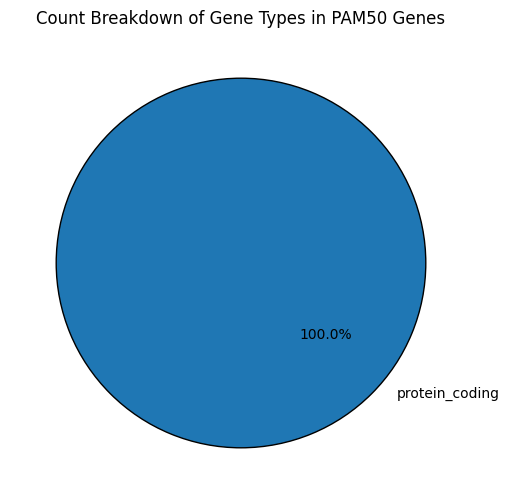

In [15]:
# Filter for only PAM50 genes
only_pam50_df = merged_df[merged_df["GENESYMBOL"].isin(PAM50_genes)]
only_pam50_df = only_pam50_df.reset_index(drop=True)

# Group by GENETYPE and count occurrences
gene_type_counts = only_pam50_df.groupby("GENETYPE").size().reset_index(name="Count")

# Sort values by count
gene_type_counts = gene_type_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display dataframe
print(gene_type_counts)

# Plot Pie Chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    gene_type_counts["Count"], 
    labels=gene_type_counts["GENETYPE"], 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)
ax.set_title("Count Breakdown of Gene Types in PAM50 Genes")

# Show the chart
plt.show()

                             GENETYPE  Count  Percentage
0                      protein_coding     78   61.417323
1                processed_pseudogene     28   22.047244
2                              lncRNA     14   11.023622
3  transcribed_unprocessed_pseudogene      6    4.724409
4              unprocessed_pseudogene      1    0.787402


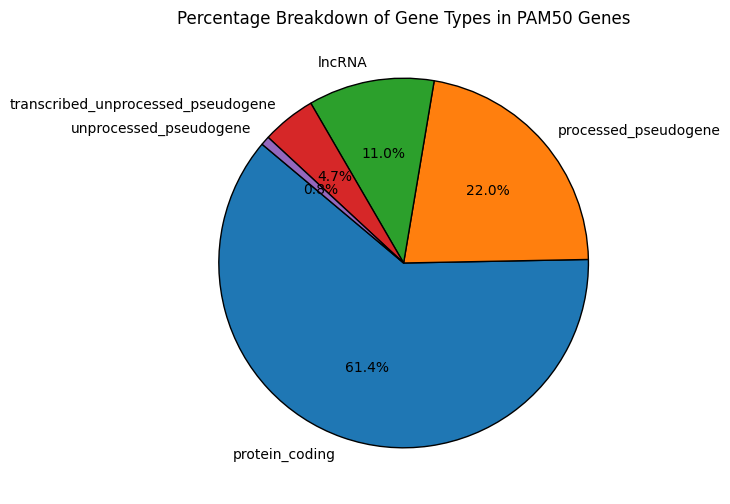

In [16]:
# Group by GENETYPE and count occurrences
gene_type_counts = pam50_df.groupby("GENETYPE").size().reset_index(name="Count")

# Calculate total gene count
total_genes = gene_type_counts["Count"].sum()

# Add percentage column
gene_type_counts["Percentage"] = (gene_type_counts["Count"] / total_genes) * 100

# Sort values by percentage
gene_type_counts = gene_type_counts.sort_values(by="Percentage", ascending=False).reset_index(drop=True)

# Display dataframe
print(gene_type_counts)

# Plot Pie Chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    gene_type_counts["Percentage"], 
    labels=gene_type_counts["GENETYPE"], 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)
ax.set_title("Percentage Breakdown of Gene Types in PAM50 Genes")

# Show the chart
plt.show()

In [17]:
# want to grab all of the protein coding genes that are in the PAM50 and reseted the index
pam50_protein_coding_df = pam50_df[pam50_df["GENETYPE"] == "protein_coding"]
pam50_protein_coding_df = pam50_protein_coding_df.reset_index(drop=True)
pam50_protein_coding_df.head()

,ENSEMBLID,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
0,ENSG00000005810,3011,3416,1022,3172,3259,4047,2958,6913,3910,...,1014,1073,1558,886,793,1619,3781,2108,MYCBP2,protein_coding
1,ENSG00000011426,2630,971,1543,1482,3704,1343,800,3848,3136,...,910,1707,1876,848,321,2516,645,2358,ANLN,protein_coding
2,ENSG00000048392,2850,1882,1303,2167,4243,4022,1451,2398,6811,...,1906,1782,1840,1107,2962,3081,1895,2019,RRM2B,protein_coding
3,ENSG00000054598,410,382,4034,65,313,845,363,423,635,...,626,412,767,114,664,606,1043,513,FOXC1,protein_coding
4,ENSG00000062038,1987,3269,2214,74,1530,7085,3052,1749,2668,...,27,204,161,218,10,65,831,66,CDH3,protein_coding


In [18]:
pam50_protein_coding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 786 entries, ENSEMBLID to GENETYPE
dtypes: int64(783), object(3)
memory usage: 479.1+ KB


In [19]:
# Reshape gene expression data: Transpose so samples (TCGA IDs) become rows
transposed_pam50 = pam50_protein_coding_df.T  # Now rows = samples, columns = genes
transposed_pam50.head(5)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
ENSEMBLID,ENSG00000005810,ENSG00000011426,ENSG00000048392,ENSG00000054598,ENSG00000062038,ENSG00000077152,ENSG00000082175,ENSG00000089685,ENSG00000090889,ENSG00000090971,...,ENSG00000176890,ENSG00000183255,ENSG00000186081,ENSG00000186847,ENSG00000186868,ENSG00000188761,ENSG00000214114,ENSG00000258643,ENSG00000261857,ENSG00000268975
TCGA-B6-A0IG-01A-11R-A034-07,3011,2630,2850,410,1987,2046,1573,1856,2465,2620,...,688,28382,8850,4560,2941,136,1237,9,0,0
TCGA-BH-A0HQ-01A-11R-A034-07,3416,971,1882,382,3269,465,9767,796,606,944,...,157,17798,10248,8719,16482,22,1770,2,2,0
TCGA-BH-A18G-01A-11R-A12D-07,1022,1543,1303,4034,2214,1518,22,3341,710,261,...,155,19395,583,117,97,6,819,2,10,0
TCGA-A8-A09K-01A-11R-A00Z-07,3172,1482,2167,65,74,702,864,3153,1302,1348,...,479,13587,157,91,20676,23,1424,11,0,0


In [20]:
# Merge metadata to tranpose gene expression + mapping data 
df1 = metadata_df.merge(transposed_pam50, left_on="mRNA", right_index=True, how="inner")
df1.head(5)

,mRNA,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2,0,1,2,...,68,69,70,71,72,73,74,75,76,77
0,TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.73,-0.568397,Positive,Positive,Positive,3011,2630,2850,...,688,28382,8850,4560,2941,136,1237,9,0,0
1,TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.52,-0.821974,NaN,NaN,Negative,3416,971,1882,...,157,17798,10248,8719,16482,22,1770,2,2,0
2,TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.79,0.423067,Negative,Negative,Negative,1022,1543,1303,...,155,19395,583,117,97,6,819,2,10,0
3,TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.00,0.026868,Positive,Positive,Negative,3172,1482,2167,...,479,13587,157,91,20676,23,1424,11,0,0
4,TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.37,0.247682,Positive,Positive,Negative,3259,3704,4243,...,620,31124,3812,2828,792,10,1990,15,0,0


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 0 to 782
Data columns (total 85 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mRNA                783 non-null    object 
 1   PAM50               783 non-null    object 
 2   TumorPurity         728 non-null    float64
 3   ProliferationScore  783 non-null    float64
 4   ER                  672 non-null    object 
 5   PR                  672 non-null    object 
 6   HER2                783 non-null    object 
 7   0                   783 non-null    object 
 8   1                   783 non-null    object 
 9   2                   783 non-null    object 
 10  3                   783 non-null    object 
 11  4                   783 non-null    object 
 12  5                   783 non-null    object 
 13  6                   783 non-null    object 
 14  7                   783 non-null    object 
 15  8                   783 non-null    object 
 16  9            

In [22]:
missing_values = df1.isnull().sum()
missing_values.head(5)

mRNA                    0
PAM50                   0
TumorPurity            55
ProliferationScore      0
ER                    111
dtype: int64

In [23]:
grouped_by_subtype = df1.groupby("PAM50").count()
grouped_by_subtype


,mRNA,TumorPurity,ProliferationScore,ER,PR,HER2,0,1,2,3,...,68,69,70,71,72,73,74,75,76,77
PAM50,,,,,,,,,,,,,,,,,,,,,
Basal,138,128,138,116,116,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
HER2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Her2,59,57,59,53,53,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
LumA,397,364,397,341,341,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
LumB,162,155,162,135,135,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
Normal,24,21,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


In [24]:
# Fill missing values in TumorPurity with the median value
df1["TumorPurity"].fillna(df1["TumorPurity"].median(), inplace=True)

# Group by PAM50 and compute mean gene expression per subtype
grouped_by_subtype = df1.groupby("PAM50").mean(numeric_only=True)

# Display the result
print(grouped_by_subtype)


        TumorPurity  ProliferationScore
PAM50                                  
Basal      0.565732            0.283296
HER2       0.718997            0.324422
Her2       0.492203            0.108835
LumA       0.595455           -0.516485
LumB       0.658486            0.132940
Normal     0.554792           -0.605161


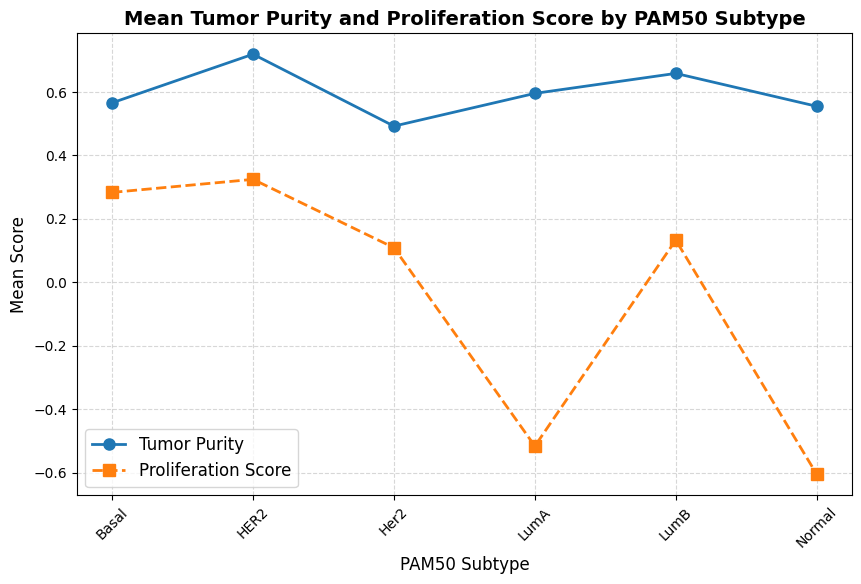

In [25]:
# Ensure the required columns exist before plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Convert index to string (useful if it's categorical)
x_labels = grouped_by_subtype.index.astype(str)

# Plot Tumor Purity
ax.plot(x_labels, grouped_by_subtype["TumorPurity"], 
        marker="o", markersize=8, linestyle="-", linewidth=2, 
        label="Tumor Purity", color="#1f77b4")

# Plot Proliferation Score
ax.plot(x_labels, grouped_by_subtype["ProliferationScore"], 
        marker="s", markersize=8, linestyle="--", linewidth=2, 
        label="Proliferation Score", color="#ff7f0e")

ax.set_title("Mean Tumor Purity and Proliferation Score by PAM50 Subtype", fontsize=14, fontweight='bold')
ax.set_xlabel("PAM50 Subtype", fontsize=12)
ax.set_ylabel("Mean Score", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(fontsize=12)
plt.show()

- Higher proliferation scores = More aggressive tumor types (HER2, Basal, LumB).
- Lower proliferation scores = Less aggressive tumor types (LumA, Normal).
- Tumor purity varies but remains relatively high across all subtypes.

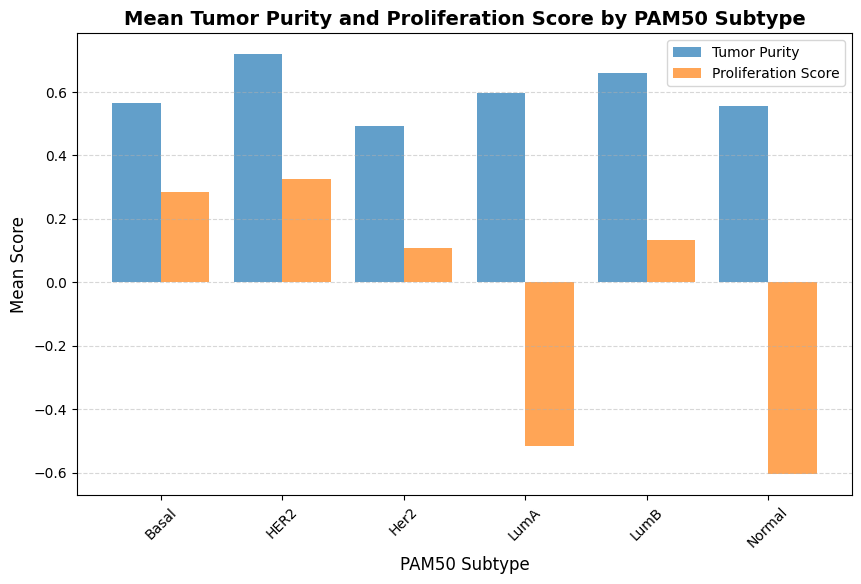

In [26]:
# Define bar width
bar_width = 0.4

# Define x positions for bars
x = np.arange(len(grouped_by_subtype))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Tumor Purity bars
ax.bar(x - bar_width/2, grouped_by_subtype["TumorPurity"], 
       bar_width, color="#1f77b4", alpha=0.7, label="Tumor Purity")

# Plot Proliferation Score bars
ax.bar(x + bar_width/2, grouped_by_subtype["ProliferationScore"], 
       bar_width, color="#ff7f0e", alpha=0.7, label="Proliferation Score")

# Formatting
ax.set_title("Mean Tumor Purity and Proliferation Score by PAM50 Subtype", fontsize=14, fontweight='bold')
ax.set_xlabel("PAM50 Subtype", fontsize=12)
ax.set_ylabel("Mean Score", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(grouped_by_subtype.index, rotation=45, fontsize=10)
ax.legend()

# Add grid for better readability
ax.grid(axis='y', linestyle="--", alpha=0.5)

# Show the chart
plt.show()

This chart compares Tumor Purity (blue) and Proliferation Score (orange) across PAM50 subtypes. Basal, HER2, and LumB show high Tumor Purity and Proliferation, indicating aggressive tumors. LumA and Normal-like have low Proliferation, suggesting less aggressive behavior. LumA’s low Proliferation despite moderate Tumor Purity aligns with its better prognosis.

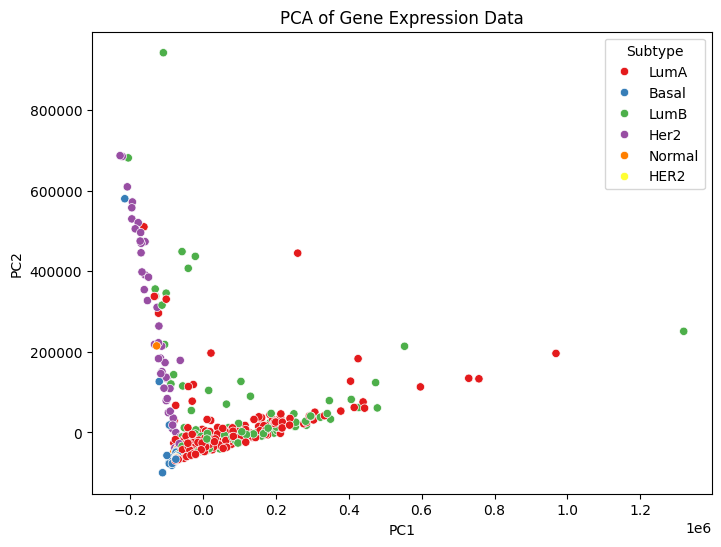

In [27]:
# Select only gene expression columns (exclude metadata)
gene_expression_data = df1.iloc[:, 7:]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(gene_expression_data)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df["Subtype"] = df1["PAM50"]  # Add subtypes

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Subtype", data=pca_df, palette="Set1")
plt.title("PCA of Gene Expression Data")
plt.show()

This PCA (Principal Component Analysis) plot visualizes the gene expression data of different breast cancer subtypes. Here’s what’s happening:

1. What the PCA Plot Represents
Each point is a sample (patient tumor)
Colors represent different PAM50 breast cancer subtypes (LumA, LumB, Basal, HER2, Normal, etc.).
PC1 (x-axis) and PC2 (y-axis) are the first two principal components, capturing the most variation in the gene expression data.
2. Observations from the Plot
Clustering of LumA (Red) at the Bottom Right

Luminal A (LumA) tumors are mostly grouped together, indicating low variability in their gene expression profiles.
This suggests that LumA tumors share a more homogeneous gene expression pattern.
Basal (Blue) and Her2 (Purple) on the Left

Basal-like and Her2-enriched tumors have a wider spread, suggesting more variability in gene expression.
These subtypes may have higher proliferation rates and more aggressive tumor characteristics.
LumB (Green) is More Spread Out

Luminal B tumors show more diversity in their expression profiles compared to LumA.
LumB tumors are known to be more aggressive than LumA but still hormone receptor-positive.
Some Outliers

A few red (LumA) and green (LumB) dots are far from the main cluster.
This could mean:
Misclassified tumors (expression patterns that don’t fit their assigned subtype).
High tumor heterogeneity (some LumA tumors may behave more like LumB or HER2).

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Variance Explained by PC1 & PC2

We check if PC1 and PC2 together explain at least 70% of the variance.
If not, we may need to consider more PCs.
Outlier Detection

Uses 3 standard deviations rule to detect outliers in PC1 & PC2.
Outliers could be highly mutated tumors or low-purity samples.
Tumor Purity of Outliers

Outliers could have low tumor purity (more contamination by normal tissue).
We check their TumorPurity scores to see if this explains why they are distant.
Adding PC3 & PC4

If PC1 & PC2 do not clearly separate subtypes, we visualize PC3 & PC4.

In [29]:
# Step 1: Perform PCA with more components to check variance explained
pca = PCA(n_components=10)  # Keeping 10 components to analyze variance
principal_components = pca.fit_transform(df1.iloc[:, 7:])  # Using only gene expression columns

# Variance explained by first 2 PCs
explained_variance = pca.explained_variance_ratio_
cumulative_variance_pc2 = np.sum(explained_variance[:2])

print(f"Variance Explained by PC1 & PC2: {cumulative_variance_pc2 * 100:.2f}%")

Variance Explained by PC1 & PC2: 74.67%


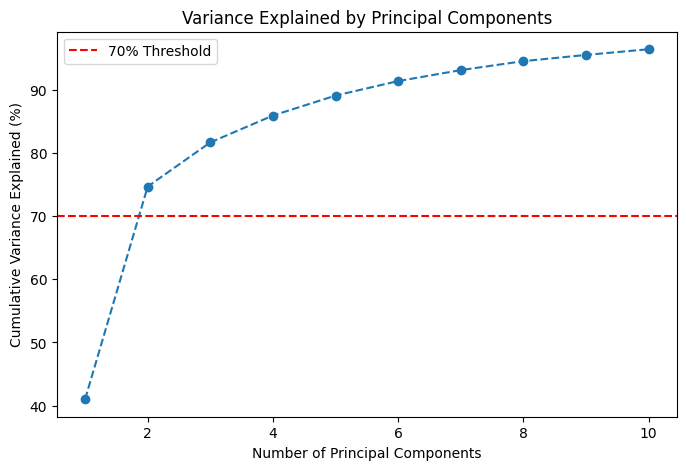

In [30]:
# Plot explained variance for the first 10 PCs
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), np.cumsum(explained_variance[:10]) * 100, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("Variance Explained by Principal Components")
plt.axhline(y=70, color='r', linestyle='--', label="70% Threshold")
plt.legend()
plt.show()

In [31]:
# Step 2: Convert PCA results into a DataFrame
pca_df = pd.DataFrame(principal_components[:, :4], columns=["PC1", "PC2", "PC3", "PC4"])
pca_df["Subtype"] = df1["PAM50"]  # Add cancer subtype
pca_df["TumorPurity"] = df1["TumorPurity"]  # Add tumor purity for checking outliers

# Step 3: Detect outliers (beyond 3 standard deviations)
threshold = 3
outliers = (np.abs(pca_df["PC1"] - pca_df["PC1"].mean()) > threshold * pca_df["PC1"].std()) | \
           (np.abs(pca_df["PC2"] - pca_df["PC2"].mean()) > threshold * pca_df["PC2"].std())

outlier_samples = pca_df[outliers]

print(f"Detected {len(outlier_samples)} potential outliers in PCA space.")

Detected 41 potential outliers in PCA space.


In [32]:
# Step 4: Check tumor purity of outliers (to see if normal tissue contamination is affecting results)
if not outlier_samples.empty:
    print("Tumor Purity of Outliers:")
    print(outlier_samples[["PC1", "PC2", "Subtype", "TumorPurity"]])


Tumor Purity of Outliers:
              PC1            PC2 Subtype  TumorPurity
10  -1.611804e+05  510480.494765    LumA         0.59
11  -5.676608e+04  449072.727418    LumB         0.50
16   4.272420e+05   62003.776202    LumB         0.88
50   7.572225e+05  133289.534120    LumA         0.80
57  -2.136596e+05  580273.664623   Basal         0.42
69  -1.943893e+05  530206.487085    Her2         0.27
84  -3.971577e+04  407547.726722    LumB         0.55
95   4.071567e+05   82078.746408    LumB         0.83
101  4.052601e+05  127423.615256    LumA         0.78
115  5.532691e+05  214022.091451    LumB         0.74
127 -1.079516e+05  942729.061944    LumB         0.60
131  4.258585e+05  183276.325202    LumA         0.48
145 -1.690839e+05  446092.957149    Her2         0.55
185  9.684499e+05  196324.058304    LumA         0.79
191  7.292608e+05  134568.891501    LumA         0.51
203 -2.036209e+04  437217.047606    LumB         0.56
210 -1.768723e+05  520841.750270    Her2         0.20
22

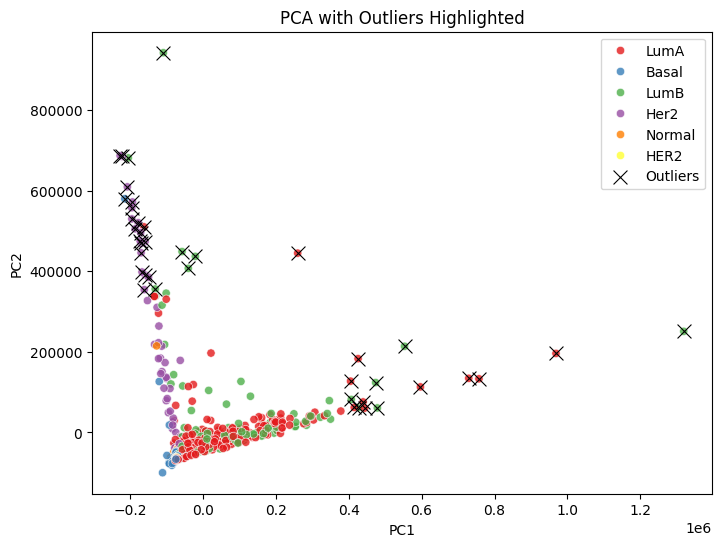

In [33]:
# Step 5: Visualize PCA with outliers highlighted
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Subtype", data=pca_df, palette="Set1", alpha=0.8)
sns.scatterplot(x=outlier_samples["PC1"], y=outlier_samples["PC2"], color="black", label="Outliers", marker="x", s=100)
plt.title("PCA with Outliers Highlighted")
plt.legend()
plt.show()

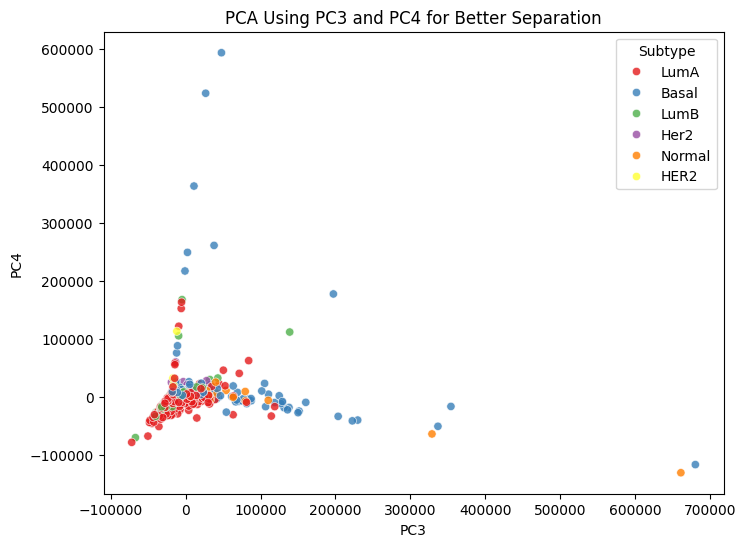

In [34]:
# Step 6: Use PC3 & PC4 for better separation
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC3", y="PC4", hue="Subtype", data=pca_df, palette="Set1", alpha=0.8)
plt.title("PCA Using PC3 and PC4 for Better Separation")
plt.show()